In [42]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target

In [44]:
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
df.label.value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

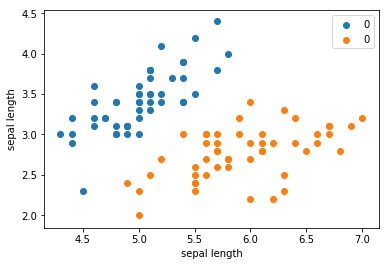

In [45]:
plt.scatter(df[:50]['sepal length'],df[:50]['sepal width'], label = 0)
plt.scatter(df[50:100]['sepal length'],df[50:100]['sepal width'], label = 0)
plt.xlabel('sepal length')
plt.ylabel('sepal length')
plt.legend()

In [46]:
data = np.array(df.iloc[:100, [0, 1, -1]])
X, y = data[:, :-1], data[:, -1]
y = [1 if i == 1 else -1 for i in y]

In [47]:
class Model:
    def __init__(self):
        self.w = np.ones(len(data[0])-1,dtype = np.float32)
        self.b = 0
        self.l_r = 0.1
    
    def sign(self, x, w, b):
        y = np.dot(x, w) + b
        return y
        
    def fit(self, X_train, y_train):
        is_wrong = False
        while not is_wrong:
            count_wrong = 0
            for i in range(len(X_train)):
                x = X_train[i]
                y = y_train[i]
                if y * self.sign(x, self.w, self.b) <= 0:  
                    self.w = self.w + self.l_r * np.dot(y, x)  
                    self.b = self.b + self.l_r * y
                    count_wrong += 1
            if count_wrong == 0:
                is_wrong = True
        return 'Perceptron Model'
            
    def predoct(self, X_test):
        pass
    

In [48]:
PM = Model()

In [49]:
PM.fit(X, y)

'Perceptron Model'

In [50]:
PM.w

array([  7.8, -10. ])

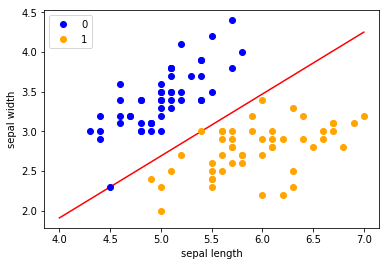

In [51]:
x_points = np.linspace(4, 7, 10)
y_ = -(PM.w[0]*x_points + PM.b)/PM.w[1]
plt.plot(x_points, y_, 'r')

plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')

plt.legend()

In [52]:
from sklearn.linear_model import Perceptron

In [53]:
clf = Perceptron(fit_intercept=True, max_iter=1000, shuffle=False)
clf.fit(X, y)

Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=1000, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=False, tol=None, verbose=0, warm_start=False)

In [54]:
print(clf1.coef_)

[[  79.8 -101.4]]


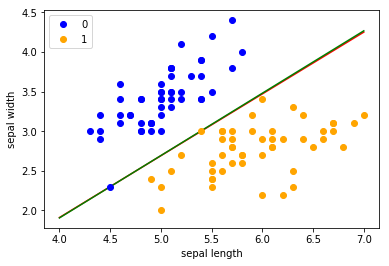

In [55]:
x_points = np.linspace(4, 7, 10)
y1 = -(PM.w[0]*x_points + PM.b)/PM.w[1]
y2 = -(clf1.coef_[0][0]*x_points + clf1.intercept_)/clf1.coef_[0][1]
plt.plot(x_points, y1, 'r')
plt.plot(x_points, y2, 'g')

plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')

plt.legend()